In this notebook we have applied Gradient Descent both from scratch and using sklearn SGDRegressor class to Linear Regression.

In [183]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [184]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=2)

In [185]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=13)

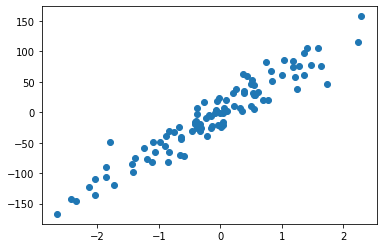

In [186]:
plt.scatter(X,y)

In [207]:
"""
Linear Regression using Stochastic Gradient Descent.
"""
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor()
reg.fit(X_train,y_train)

print(reg.coef_)
print(reg.intercept_)

[58.00131999]
[1.45965271]


In [199]:
y_test

array([   9.44506047,    2.51352804,   32.12925769,   51.91525767,
          6.92428027,  -15.18039423,   -1.37114106,    1.63049652,
        -16.85774471,   61.17460846,  115.44179673,  -26.07994395,
        -32.18524905,  -77.51141039,   -9.2643982 ,  -64.53825927,
        -70.08095861,  -84.85367831,  -59.45098934, -167.01636233])

In [200]:
y_pred = reg.predict(X_test)
y_pred

array([  14.08181678,   21.90196143,   31.96391966,   50.4250767 ,
         20.45801113,  -21.89403023,    1.54229835,   -2.77941808,
        -22.64055263,   59.58774761,  131.01631053,  -16.64951384,
        -41.85331924,  -67.36921586,  -12.16279572,  -47.30047813,
        -36.36297452,  -81.98140837,  -70.71584178, -152.77225148])

In [201]:
r2_score(y_test,y_pred)

0.9577953976216946

In [206]:
"""
Create a class from scratch to perform Gradient Descent on Linear Regression.
"""
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = 1
        self.b = 0
        self.lr = learning_rate
        self.epochs = epochs
        pass 
    def fit(self,X,y):
        for i in range(self.epochs):
            slope_b = -2 * np.sum(y - (self.m * X.ravel()) - self.b)
            slope_m = -2 * np.sum((y - (self.m * X.ravel()) - self.b) * X.ravel())
            
            self.b = self.b - (self.lr * slope_b)
            self.m = self.m - (self.lr * slope_m)
        print(self.b,self.m)
    
    def predict(self,X):
        return self.m * X + self.b

In [203]:
"""
If you don't have an accurate learning rate your model either might converge very slowly or shoots off from the optimal value.
"""
reg1 = GDRegressor(0.001,70)

In [204]:
reg1.fit(X_train,y_train)

1.514084314936032 58.00604366226165


In [205]:
y_pred = reg1.predict(X_test)

In [197]:
r2_score(y_test,y_pred)

0.9578610443300801